#  A simple deep CNN
[reference](https://keras.io/examples/cifar10_cnn/)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, ZeroPadding1D, Convolution1D
import os

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import metrics
sns.set_style('whitegrid')
sns.set_palette('Set2')
# %matplotlib inline

In [3]:
def probability_to_label(probabilities, threshold=0.5):
    probabilities = list(probabilities)
    th = threshold
    predictions = [1 if i > th else 0 for i in probabilities]
    return predictions

In [4]:
def plot_cm(y_true, y_pred,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    sns.set_style('white')
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normarlize 
    
    from sklearn.utils.multiclass import unique_labels
    classes = unique_labels(y_true, y_pred)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    pass

In [5]:
def plot_ROC(fpr, tpr, auc, title = 'ROC curve'):
    sns.set_style('whitegrid')

#     plt.figure(figsize=(8,6))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=' (AUC = {:.3f})'.format(auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()
    pass

In [6]:
def plot_PRC(precision, recall, ap, title= 'Precision-Recall Curve '):
    sns.set_style('whitegrid')

    plt.figure
#     plot(result5_1[0], result5_1[1],linestyle = "-", color = 'C0')#,label = 'AUC = %0.2f' % result5_1[3])
    plt.plot(recall, precision, lw=2, label='AP = %0.4f' % ap )
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="best")
#     plt.show()
    return 

In [7]:
train_model = True
batch_size = 32
num_classes = 2
epochs = 30
data_augmentation = False
# num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_trained_model_one_year.h5'

In [8]:
# data =pd.read_csv('data_pre_processed.csv')
testing_data = pd.read_csv('data_pp_test_1y.csv')
training_data=  pd.read_csv('data_pp_train_1y.csv')
data = training_data

In [9]:
print('Total data shape is ', data.shape)
data.head()

Total data shape is  (38857, 111)


,first_careunit,last_careunit,age,gender,marital_status,insurance,urea_n_min,urea_n_max,urea_n_mean,platelets_min,...,spo2_max_mv,spo2_mean_mv,vent_mv,rrt_mv,urineoutput_mv,oasis_mv,lods_mv,sirs_mv,thirty_days,one_year
0,0.358226,-0.375558,-0.091698,-1.125040,0.002484,0.721077,0.336293,0.533833,0.568295,-0.307287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.058760,1.040694,-0.138448,-1.125040,-0.795334,0.721077,1.458096,0.982380,1.364434,-0.617702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.358226,-0.375558,4.139580,-1.125040,-0.795334,0.721077,-0.411576,-0.523458,-0.401365,-1.206421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.058760,1.040694,0.115679,-1.125040,-0.795334,0.721077,0.261506,-0.395301,-0.145096,2.058292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.358226,-0.375558,-0.268887,0.888858,0.800302,-0.508846,0.111932,-0.299184,-0.088050,-1.067269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
columns = list(data.columns)

X = training_data[columns[0:-2]].astype(np.float32) # fetures
y = training_data[columns[-1]].astype(np.float32)  # one year

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)


X_test = testing_data[columns[0:-2]].astype(np.float32) # fetures
y_test = testing_data[columns[-1]].astype(np.float32)  # one year 

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'validation samples')
print(X_test.shape[0], 'test samples')

X_train shape: (31085, 109)
31085 train samples
7772 validation samples
19139 test samples


In [11]:
# # Convert class vectors to binary class matrices.
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
model = Sequential()
model.add(Conv1D(32, 3, padding='same', input_shape=[X_train.shape[1],1]))
model.add(Activation('relu'))
model.add(Conv1D(32, 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
# initiate RMSprop optimizer
# opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])#, km.binary_precision(), km.binary_recall()])

X_train = X_train.values[..., None].astype('float32')
X_val = X_val.values[..., None].astype('float32')
X_test = X_test.values[..., None].astype('float32')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 109, 32)           128       
_________________________________________________________________
activation (Activation)      (None, 109, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 107, 32)           3104      
_________________________________________________________________
activation_1 (Activation)    (None, 107, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 53, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 53, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 53, 64)            6208      
__________

In [14]:
X_train.shape

(31085, 109, 1)

In [15]:
if train_model:
    hist = model.fit(X_train, y_train,
              batch_size=64,
              epochs=30,
              verbose = 1,
              validation_data=(X_val, y_val),
              shuffle=True,
                callbacks= [keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)] )
    
    # Save model and weights
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    model_path = os.path.join(save_dir, model_name)
    model.save(model_path)
    print('Saved trained model at %s ' % model_path)

else:
    # load weights 
    filepath = './saved_models/keras_trained_model_one_year.h5'
    model.load_weights(filepath, by_name=False)


Train on 31085 samples, validate on 7772 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
31085/31085 [==============================] - 7s 232us/sample - loss: 0.4729 - acc: 0.7748 - val_loss: 0.4182 - val_acc: 0.8089
Epoch 2/30
31085/31085 [==============================] - 5s 171us/sample - loss: 0.4151 - acc: 0.8069 - val_loss: 0.3831 - val_acc: 0.8204
Epoch 3/30
31085/31085 [==============================] - 5s 170us/sample - loss: 0.3814 - acc: 0.8241 - val_loss: 0.3699 - val_acc: 0.8290
Epoch 4/30
31085/31085 [==============================] - 5s 158us/sample - loss: 0.3685 - acc: 0.8310 - val_loss: 0.3569 - val_acc: 0.8358
Epoch 5/30
31085/31085 [==============================] - 5s 156us/sample - loss: 0.3552 - acc: 0.8379 - val_loss: 0.3476 - val_acc: 0.8439
Epoch 6/30
31085/31085 [==============================] - 5s 166us/sample - loss: 0.3442 - acc: 0.8443 - val_loss: 0.3381 - val_acc: 0.8424
Epoch 7/30
31085/31085 [==============================] - 5s 17

In [16]:

# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

19139/19139 [==============================] - 2s 81us/sample - loss: 0.2622 - acc: 0.8894
Test loss: 0.26222781873073525
Test accuracy: 0.8894404


In [17]:
y_score = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
auc = metrics.auc(fpr, tpr)
auc

0.9416261967032793

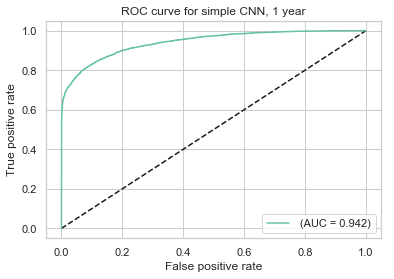

In [18]:
plot_ROC(fpr, tpr, auc, title = 'ROC curve for simple CNN, 1 year')

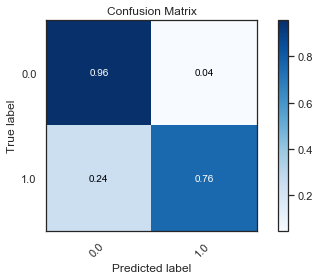

In [19]:
y_pred = probability_to_label(y_score, threshold=0.5)
plot_cm(y_test, y_pred)

In [20]:
average_precision = metrics.average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.92


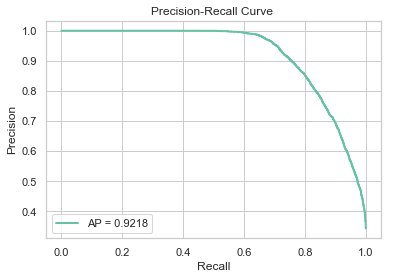

In [21]:
precision, recall, _ = metrics.precision_recall_curve(y_test, y_score)
plot_PRC(precision, recall, average_precision)

# Modified VGG16
[reference](https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3)

In [22]:
model = Sequential()
model.add(ZeroPadding1D(1,input_shape=[X_train.shape[1],1]))
model.add(Convolution1D(64, 3, activation='relu'))
model.add(ZeroPadding1D(1))
model.add(Convolution1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2, strides=2))

model.add(ZeroPadding1D(1))
model.add(Convolution1D(128, 3, activation='relu'))
model.add(ZeroPadding1D(1))
model.add(Convolution1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2, strides=2))

model.add(ZeroPadding1D(1))
model.add(Convolution1D(256, 3, activation='relu'))
model.add(ZeroPadding1D(1))
model.add(Convolution1D(256, 3, activation='relu'))
model.add(ZeroPadding1D(1))
model.add(Convolution1D(256, 3, activation='relu'))
model.add(MaxPooling1D(2, strides=2))

model.add(ZeroPadding1D(1))
model.add(Convolution1D(512, 3, activation='relu'))
model.add(ZeroPadding1D(1))
model.add(Convolution1D(512, 3, activation='relu'))
model.add(ZeroPadding1D(1))
model.add(Convolution1D(512, 3, activation='relu'))
model.add(MaxPooling1D(2, strides=2))

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))



In [23]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'] )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding1d (ZeroPadding1 (None, 111, 1)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 109, 64)           256       
_________________________________________________________________
zero_padding1d_1 (ZeroPaddin (None, 111, 64)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 109, 64)           12352     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 54, 64)            0         
_________________________________________________________________
zero_padding1d_2 (ZeroPaddin (None, 56, 64)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 54, 128)           24704     
__________

In [24]:
if train_model:
    hist = model.fit(X_train, y_train,
              batch_size=64,
              epochs=30,
              verbose = 1,
              validation_data=(X_val, y_val),
              shuffle=True,
                callbacks= [keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)] )
    # Save model and weights
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    model_path = os.path.join(save_dir, 'Modified_VGG_one_year.h5')
    model.save(model_path)
    print('Saved trained model at %s ' % model_path)
else:
    # load weights 
    filepath = './saved_models/Modified_VGG_one_year.h5'
    model.load_weights(filepath, by_name=False)


Train on 31085 samples, validate on 7772 samples
Epoch 1/30
31085/31085 [==============================] - 27s 859us/sample - loss: 0.5093 - acc: 0.7551 - val_loss: 0.4468 - val_acc: 0.7926
Epoch 2/30
31085/31085 [==============================] - 27s 855us/sample - loss: 0.3916 - acc: 0.8182 - val_loss: 0.3876 - val_acc: 0.8286
Epoch 3/30
31085/31085 [==============================] - 23s 755us/sample - loss: 0.3603 - acc: 0.8356 - val_loss: 0.3623 - val_acc: 0.8327
Epoch 4/30
31085/31085 [==============================] - 23s 753us/sample - loss: 0.3374 - acc: 0.8479 - val_loss: 0.3529 - val_acc: 0.8426
Epoch 5/30
31085/31085 [==============================] - 23s 753us/sample - loss: 0.3259 - acc: 0.8545 - val_loss: 0.3538 - val_acc: 0.8464
Epoch 6/30
31085/31085 [==============================] - 23s 752us/sample - loss: 0.3063 - acc: 0.8674 - val_loss: 0.3396 - val_acc: 0.8501
Epoch 7/30
31085/31085 [==============================] - 23s 751us/sample - loss: 0.2863 - acc: 0.8790 -

In [25]:


# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

19139/19139 [==============================] - 6s 306us/sample - loss: 0.3043 - acc: 0.8705
Test loss: 0.30427640165830583
Test accuracy: 0.87052613


In [26]:
y_score = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
auc = metrics.auc(fpr, tpr)
auc

0.9247142893578602

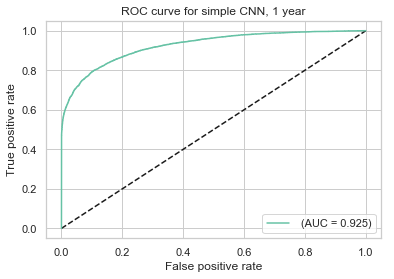

In [27]:
plot_ROC(fpr, tpr, auc, title = 'ROC curve for simple CNN, 1 year')

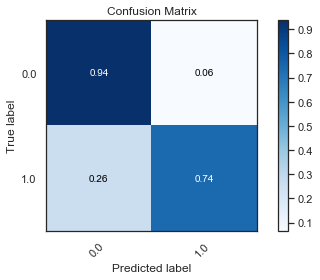

In [28]:
y_pred = probability_to_label(y_score, threshold=0.5)
plot_cm(y_test, y_pred)

In [29]:
average_precision = metrics.average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.90


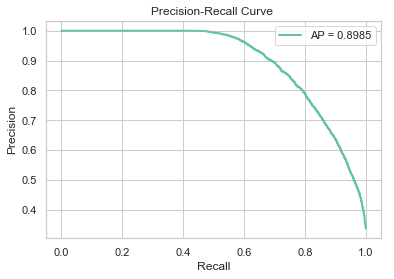

In [30]:
precision, recall, _ = metrics.precision_recall_curve(y_test, y_score)
plot_PRC(precision, recall, average_precision)